<h1>Este projeto é baseado em uma ideia de projeto presente no site<a href="https://medium.com/comunidadeds/5-projetos-de-ci%C3%AAncia-de-dados-para-o-seu-portf%C3%B3lio-de-projetos-5fda646273e3"> Medium</a>. Para isto vamos utilizar o data set "House Sales in King County, USA" presente no Kaggle.
A ideia aqui é seguir uma pequena história ficticia onde iremos basicamente analisar estes dados para responder algumas perguntas para tomada de decisão de um negócio de uma empresa imobiliaria deste condado.<br> Este projeto será dividido em 5 partes para melhor organização:
</h1>
<p>
    <ol>
        <li>Definição do problema;</li>
        <li>Planejamento;</li>
        <li>Coleta dos dados;</li>
        <li>Apuração dos dados;</li>
        <li>Apresentação dos dados;</li>
        <li>Análise e interpretação de dados.</li>
    </ol>
</p>


<h3>Definição do problema:</h3>

<p>History Line:<br>
Fui contrado por uma empresa de compra e vendas de casas sediada no condado de King County, um dos 39 condados de Whashington. Ela possui dados acerca das vendas de casas no condado entre maio de 2014 a maio de 2015 e gostaria de uma análise destes dados, afim de responder algumas perguntas para uma melhor tomada de descisão do negócio. <br>As perguntas são:</p>
<ol>
    <li>Quais as melhores casas a se comprar e por qual preço de acordo com as regiões.</li>
    <li>Vale a pena fazer reformas ou adições ao imóvel?</li>
    <li>Existe uma melhor época do ano para venda?</li>
    <li>Qual a melhor e pior região para compra?</li>
</ol>

<h3>Planejamento:</h3>

<p>Em um primeiro momento faremos uma exploração dos dados, afim de entender do que se trata estes dados e fazer uma limpeza, retirando coisas "inuteis" para o nosso projeto.<br>Após isso criaremos e testaremos hipóteses, finalmente criaremos gráficos com os resultados obtidos.<br><br> Obs: Já temos nosso data set, então não precisaremos ir atrás dos dados.</p>

<h3>Coleta de dados</h3>

<p>Aqui iremos importar nossos dados junto das bibliotecas que vamos utilizar, a Pandas e a Matplotlib.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dados = pd.read_csv('kc_house_data.csv',sep=',')
dados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<h3>Apuração dos dados:</h3>

<p>Agora vamos fazer a apuração dos dados, faremos um tramento dos dados afim de condeçar as informações que nos são úteis.<br>Antes vamos entender do que se trata cada uma das colunas:</p>
<ul>
    <li><b><em>id:</em></b> Um id de identificação do imóvel.</li>
    <li><b><em>date:</em></b> Data de venda.</li>
    <li><b><em>price:</em></b> Preço de venda.</li>
    <li><b><em>bedrooms:</em></b> Banheiros, onde 0,5 é um banheiro apenas com vaso sanitário.</li>
    <li><b><em>bathrooms:</em></b> Quartos.</li>
    <li><b><em>sqft_living:</em></b> Tamanho do imóvel em pés².</li>
    <li><b><em>sqft_lot:</em></b> Tamanho do terreno em pés².</li>
    <li><b><em>floors:</em></b> Andares.</li>
    <li><b><em>waterfront:</em></b> Beira do mar.</li>
    <li><b><em>view:</em></b> Uma nota que varia de 0 a 4 para a vista.</li>
    <li><b><em>condition:</em></b> Condição do imóvel que varia de 1 a 5.</li>
    <li><b><em>grade:</em></b> Uma nota para o projeto imóvel que varia de 1 a 13.</li>
    <li><b><em>sqft_above:</em></b> Quantidade pés² da aréa acima do solo.</li>
    <li><b><em>sqft_basement:</em></b> Tamanho do porão em pés².</li>
    <li><b><em>yr_built:</em></b> Ano de construção.</li>
    <li><b><em>yr_renovated:</em></b> Ano de reforma.</li>
    <li><b><em>zipcode:</em></b> Códigopostal:</li>
    <li><b><em>lat:</em></b> Latitude.</li>
    <li><b><em>long:</em></b> Longitude</li>
    <li><b><em>sqft_living15:</em></b> Pés² do espaço interno da habitação para os 15 vizinhos mais próximos.</li>
    <li><b><em>sqft_lot15:</em></b> Pés² quadrada dos lotes de terra dos 15 vizinhos mais próximos.</li>
</ul>
<p>Bom, vejamos se não há casas duplicadas e depois podemos remover a coluna 'id', que não tem relevância para nosso projeto, visto que é apenas uma identificação, então vamos remove-la. Outro detalhe são as datas, estão num formato um tanto quanto estranho, vamos mudar apenas para meses, pois temos cerca de 377 datas diferentes logo é interessante resumi-las. Em seguida vamos verificar valores nulos e descrepantes.</p>

In [2]:
dados['id'].duplicated().sum()

np.int64(177)

<p>Existem casas duplicadas, mas pode ser que elas tem sido vendidas em momentos diferentes.</p>

In [3]:
duplicados = dados[dados.duplicated(subset=['id','date'], keep=False)]
duplicados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


<p>Como podemos ver não existem casas que foram vendidas mais de uma vez na mesma data, logo não há casas duplicadas. Algumas apareçem mais de uma vez, mas foram vindiadas em momentos diferentes ao longo do ano.</p>
<p>Agora vamos retirar a coluna 'id', alterar a data um formato comum e verificar valores nulos.</p>

In [4]:
dados.drop('id',axis=1,inplace=True)
dados['date'] = pd.to_datetime(dados['date'])
dados['date'] = dados['date'].dt.month
dados.sort_values('price',inplace=True)
dados.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
dados

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,2,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,5,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,5,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,11,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,4,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,8,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,9,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,6,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


Text(0, 0.5, 'Valor em milhões')

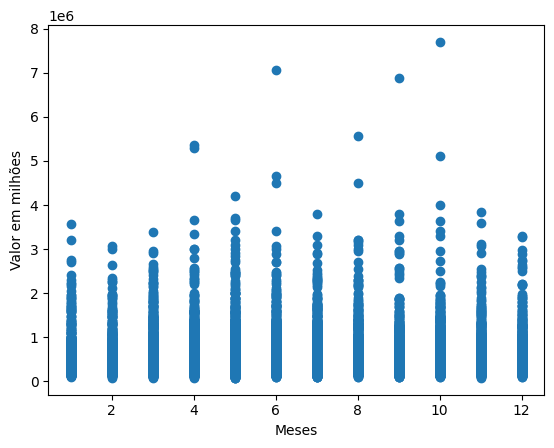

In [6]:
plt.scatter(dados['date'],dados['price'])
plt.xlabel("Meses")
plt.ylabel("Valor em milhões")

Text(0, 0.5, 'Valor em milhões')

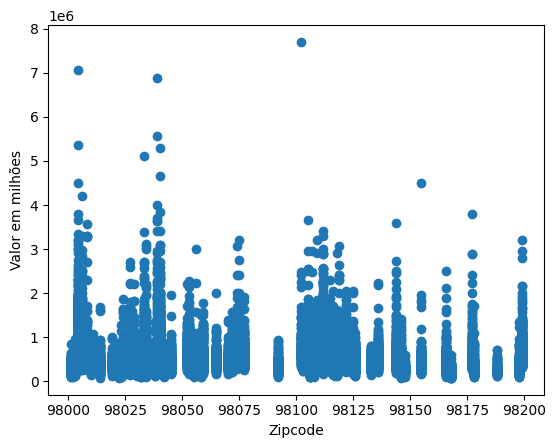

In [7]:
plt.scatter(dados['zipcode'],dados['price'])
plt.xlabel("Zipcode")
plt.ylabel("Valor em milhões")

Text(0, 0.5, 'Valor em milhões')

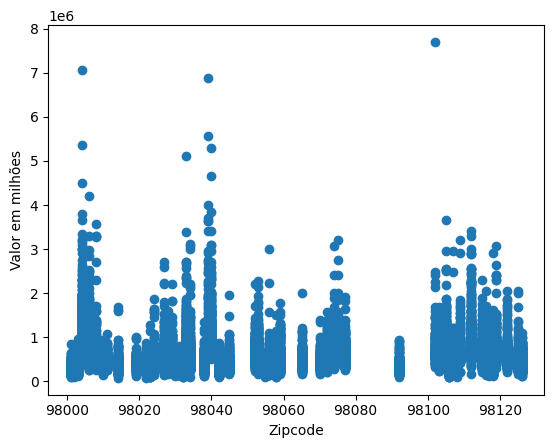

In [8]:
remover = [x for x in range(98130,98200)]
dados = dados.query('@remover not in zipcode')
plt.scatter(dados['zipcode'],dados['price'])
plt.xlabel("Zipcode")
plt.ylabel("Valor em milhões")

Text(0, 0.5, 'Valor em milhões')

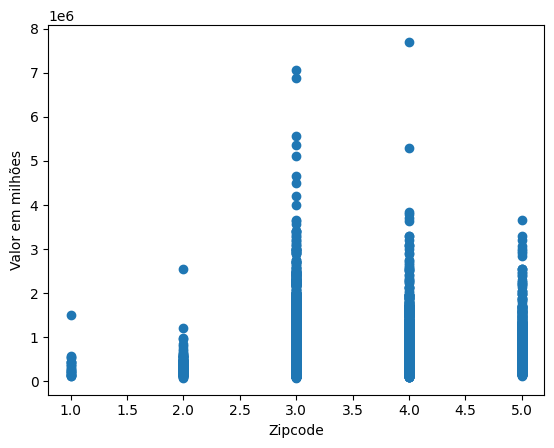

In [10]:
plt.scatter(dados['condition'],dados['price'])
plt.xlabel("Zipcode")
plt.ylabel("Valor em milhões")